In [1]:
import pandas as pd
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [2]:
# 1. Drop column Origin from the dataset.
df.drop('origin', axis = 1, inplace = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [3]:
# 2. Find out all the missing values in the dataset and replace it with its most appropriate replacement. 
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [4]:
df1 = df[df.isna().any(axis=1)]
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
9,15,8,390.0,190,3850,8.5,70.0,amc ambassador dpl,NaN
21,24,4,107.0,90,2430,NaN,70.0,audi 100 ls,JH5673R
26,10,8,307.0,200,4376,15.0,70.0,chevy c20,NaN
29,27,4,97.0,88,2130,14.5,71.0,datsun pl510,NaN
32,25,4,98.0,80,2046,19.0,71.0,ford pinto,NaN
45,18,6,258.0,110,2962,13.5,NaN,amc hornet sportabout (sw),GTHY79
52,30,4,88.0,76,2065,14.5,71.0,fiat 124b,NaN
53,31,4,71.0,65,1773,NaN,71.0,toyota corolla 1200,T568G4
54,35,4,72.0,69,1613,18.0,71.0,datsun 1200,NaN
56,26,4,91.0,70,1955,20.5,NaN,plymouth cricket,TY6764


In [5]:
# Replace missing values for column 'acceleration'
print(df.acceleration.median())
print(df.acceleration.median())
print(df.acceleration.mode())

14.0
14.0
0    12.0
1    14.5
2    15.5
Name: acceleration, dtype: float64


In [11]:
import numpy as np

rep_acceleration = df.acceleration.median()
df['acceleration'].replace(np.nan, rep_acceleration, inplace = True )
print(df.iloc[[21, 53]])

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
21   24          4         107.0          90    2430     14.046875   
53   31          4          71.0          65    1773     14.046875   

    model year             car name CAR Number  
21        70.0          audi 100 ls    JH5673R  
53        71.0  toyota corolla 1200     T568G4  


In [10]:
# Replace missing values for column 'model year'
print(df['model year'].mean())
print(df['model year'].median())
print(df['model year'].mode())

71.26041666666667
71.0
0    70.0
Name: model year, dtype: float64


In [12]:
rep_model_year = df['model year'].median()
df['model year'].replace(np.nan, rep_model_year, inplace = True )
print(df.iloc[[45, 56]])

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
45   18          6         258.0         110    2962          13.5   
56   26          4          91.0          70    1955          20.5   

    model year                    car name CAR Number  
45        71.0  amc hornet sportabout (sw)     GTHY79  
56        71.0            plymouth cricket     TY6764  


In [13]:
# Replace missing values for column 'CAR Number'
df.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
count,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98,91
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,89
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford galaxie 500,JHGY59
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
mean,18.397959,6.316327,254.423469,131.020408,3342.22449,14.046875,71.255102,NaN,NaN
std,5.872775,1.869985,124.791731,47.787109,973.39107,2.991464,1.028573,NaN,NaN
min,9.000000,3.000000,70.000000,46.000000,1613.00000,8.000000,70.000000,NaN,NaN
25%,14.000000,4.000000,120.000000,90.000000,2372.75000,12.000000,70.000000,NaN,NaN
50%,17.000000,8.000000,302.000000,133.500000,3437.50000,14.000000,71.000000,NaN,NaN
75%,23.000000,8.000000,350.750000,165.000000,4230.00000,15.500000,72.000000,NaN,NaN


In [19]:
df['CAR Number'].replace(np.nan, 'JHGY59', inplace = True)
print(df.iloc[[9, 26, 29, 32, 52, 54, 73]])

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
9    15          8         390.0         190    3850           8.5   
26   10          8         307.0         200    4376          15.0   
29   27          4          97.0          88    2130          14.5   
32   25          4          98.0          80    2046          19.0   
52   30          4          88.0          76    2065          14.5   
54   35          4          72.0          69    1613          18.0   
73   13          8         307.0         130    4098          14.0   

    model year                          car name CAR Number  
9         70.0                amc ambassador dpl     JHGY59  
26        70.0                         chevy c20     JHGY59  
29        71.0                      datsun pl510     JHGY59  
32        71.0                        ford pinto     JHGY59  
52        71.0                         fiat 124b     JHGY59  
54        71.0                       datsun 1200     JHGY59  
73   

In [20]:
# 3. Find and remove duplicate entries for the column ‘ CAR Number’
df['CAR Number'] = df['CAR Number'].drop_duplicates()

In [21]:
# 4. Get the basic insights:
print('Display the first five and last five rows')
print(df.head())
print(df.tail())

Display the first five and last five rows
   mpg  cylinders  displacement  horsepower  weight  acceleration  model year  \
0   18          8         307.0         130    3504          12.0        70.0   
1   15          8         350.0         165    3693          11.5        70.0   
2   18          8         318.0         150    3436          11.0        70.0   
3   16          8         304.0         150    3433          12.0        70.0   
4   17          8         302.0         140    3449          10.5        70.0   

                    car name CAR Number  
0  chevrolet chevelle malibu     JHGY59  
1          buick skylark 320        NaN  
2         plymouth satellite        NaN  
3              amc rebel sst        NaN  
4                ford torino        NaN  
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
93   14          8         318.0         150    4237          14.5   
94   13          8         440.0         215    4735          11.0   
95   12  

In [22]:
print('Display all the column names in the dataset')
print(df.columns)

Display all the column names in the dataset
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')


In [23]:
print('Display the concise summary of your dataset')
print(df.describe(include = 'all'))

Display the concise summary of your dataset
              mpg  cylinders  displacement  horsepower      weight  \
count   98.000000  98.000000     98.000000   98.000000    98.00000   
unique        NaN        NaN           NaN         NaN         NaN   
top           NaN        NaN           NaN         NaN         NaN   
freq          NaN        NaN           NaN         NaN         NaN   
mean    18.397959   6.316327    254.423469  131.020408  3342.22449   
std      5.872775   1.869985    124.791731   47.787109   973.39107   
min      9.000000   3.000000     70.000000   46.000000  1613.00000   
25%     14.000000   4.000000    120.000000   90.000000  2372.75000   
50%     17.000000   8.000000    302.000000  133.500000  3437.50000   
75%     23.000000   8.000000    350.750000  165.000000  4230.00000   
max     35.000000   8.000000    455.000000  225.000000  5140.00000   

        acceleration  model year          car name CAR Number  
count      98.000000   98.000000                98 

In [24]:
print('Display the name of the car with maximum number of horsepower')
for row in df.values.tolist():
    if row[3] == df['horsepower'].max():
        print(row) 

Display the name of the car with maximum number of horsepower
[14, 8, 455.0, 225, 4425, 10.0, 70.0, 'pontiac catalina', nan]
[14, 8, 455.0, 225, 3086, 10.0, 70.0, 'buick estate wagon (sw)', nan]
[12, 8, 455.0, 225, 4951, 11.0, 73.0, 'buick electra 225 custom', nan]


In [25]:
# 5. In our dataset, the fuel consumption column is "mpg" and is represented by mpg (miles per gallon) unit. Assume we are 
# developing an application in a country that accepts fuel consumption with the L/100km standard. change the name of the column
# to "L/100km". 
df.rename(columns = {'mpg':'L/100km'})
df['L/100km'] = 235 / df['mpg']

In [26]:
# 6. Normalize the column “Weight” so that the values range from 0 to 1 
df.weight = df.weight/df.weight.max()

In [27]:
# 9. In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only 
# care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? 
# Can we rearrange them into three ‘bins' to simplify analysis?
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 46.        , 105.66666667, 165.33333333, 225.        ])

In [28]:
# 10. We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,130,Medium
1,165,Medium
2,150,Medium
3,150,Medium
4,140,Medium
5,198,High
6,220,High
7,215,High
8,225,High
9,190,High


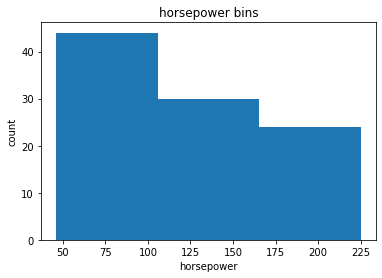

In [29]:
# 11. Use a histogram to visualize the distribution of bins we created above.
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

plt.hist(df['horsepower'], bins = 3)
plt.show()

In [30]:
# 12. Detect outliers using Z-score and remove them
from scipy import stats

df['zscore']=stats.zscore(df['acceleration'])
df.loc[df['zscore'].abs()>3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,horsepower-binned,zscore
59,23,4,97.0,54,0.438521,23.5,72.0,volkswagen type 3,NaN,10.217391,Low,3.17628


In [32]:
df['zscore']=stats.zscore(df['horsepower'])
df.loc[df['zscore'].abs()>1.5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,horsepower-binned,zscore
6,14,8,454.0,220,0.847082,9.0,70.0,chevrolet impala,NaN,16.785714,High,1.871573
7,14,8,440.0,215,0.838911,8.5,70.0,plymouth fury iii,NaN,16.785714,High,1.766405
8,14,8,455.0,225,0.860895,10.0,70.0,pontiac catalina,NaN,16.785714,High,1.976742
13,14,8,455.0,225,0.600389,10.0,70.0,buick estate wagon (sw),NaN,16.785714,High,1.976742
19,26,4,97.0,46,0.357004,20.5,70.0,volkswagen 1131 deluxe sedan,NaN,9.038462,Low,-1.788297
25,10,8,360.0,215,0.897860,14.0,70.0,ford f250,NaN,23.500000,High,1.766405
27,11,8,318.0,210,0.852529,13.5,70.0,dodge d200,NaN,21.363636,High,1.661236
59,23,4,97.0,54,0.438521,23.5,72.0,volkswagen type 3,NaN,10.217391,Low,-1.620027
67,11,8,429.0,208,0.901362,11.0,72.0,mercury marquis,NaN,21.363636,High,1.619168
94,13,8,440.0,215,0.921206,11.0,73.0,chrysler new yorker brougham,NaN,18.076923,High,1.766405


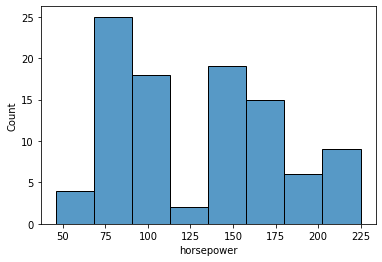

In [33]:
import seaborn as sns

sns.histplot(df.horsepower)
plt.show()